# Statistics for Data Science Workshop

## Data Science Society @Berkeley | Fall 2019

## Wednesday, October 23, 2019



### Introduction

This notebook will be covering: 
*  Probability
*  Randomization, sampling
*  Hypothesis Testing
*  P Values


Throughout this notebook we use a python library called **Pandas** in order to store and display our data (after the probability section). If you would like to learn how to use Pandas in more detail, check out our Python workshop materials: 

*INSERT LINK FOR PYTHON MATERIALS HERE*

https://pypi.python.org/pypi/datascience/


To run the cell below, click on "Run" above (right under the File Edit View... bar) or do Shift+Enter on your computer. This will run your current cell then move its position to the next one. 

## Probabilities

**So what's probability?**


Probability is the:
*   Chance
*   Likelihood

of something happening


**Why do we care?**



*   Help us make informed judgment from randomness in life
*   Estimations
*   Analyze trends
*   Statistical Inference



### Calculating Probability

The probability for a certain event $A$ to occur is:

$$P(A) = \frac{\text{number of ways event A can occur}}{\text{total number of outcomes}}$$ 

And given a certain probability of something that **would** happen, the probability of it **NOT** happening is:

$$P(\text{not A})=1-P(A)$$

**Exercise 1a.** Given a 6-sided fair dice, what is the probability of rolling an even number? 

In [0]:
even = ...
total_sides = ...
P_even = even / total_sides
P_even # last line used to display the value

**Exercise 1b.** What about the probability of rolling a *not* even number? <br> Bonus: What event is this also equivalent to? *(no need to type it, just a thinking exercise)*

In [0]:
P_not_even = 1 - ...
P_not_even
# This event is also equivalent to rolling an odd number!

**Exercise 2.** If there are 15 red balls, 28 white balls, and 7 black balls in a box, what is the probability of pulling out a ball that is **not red** from this box? What is this event also equal to?

In [0]:
red = ...
total_balls = ...
P_not_red = ...
P_not_red

### Basic Sets

Sometimes we are not only interested in 1 simple event, and we make want to stack up the conditions and calculate their probaiblity.

Given 2 **independent** events A and B:

$$P(A ∩ B) = P(A)  P(B)$$

The probability for both $A$ and $B$ to occur, $P(A ∩ B)$ ("A intersect B" or "A and B"), is the product of each event's probability to occur independently. 


**Exercise 3.** Consider 2 identical boxes with the same mix up of colored balls from above (15 R, 28 W, and 7 B), what is the probability that you will pull a red ball from the one box, and a white ball from the other at the same time?

In [0]:
one_red = ...
one_white = ...
P_red_and_white = ...
P_red_and_white

Given two **mutually exclusive** (they never happen at the same time) events A and B:

$$P(A ∪ B) = P(A) + P(B)$$

The probability for either $A$ or $B$ to occur, $P(A ∪ B)$ ("A union B" or "A or B"), is the sum of each event's probability to occur.


**Exercise 4.** Consider only one box with the same color mix up, what is the probability that you will either pull a white or a black from the box?

In [0]:
white = ...
black = ...
P_white_or_black = ...
P_white_or_black

**Challenge:** how do you calculate this for two events that are **NOT** mutually exclusive? Try drawing a venn diagram.

### Conditional Probability

Given 2 events A and B:

$$P(B|A) = \frac{P(A ∩ B)}{P(A)}$$

The probability of $B$ occurring, given $A$ has already occurred, $P(B|A)$, is given by the probability of $A$ and $B$ both occurring divided by the probability of $A$ occurring alone. 

**Exercise 5.** Given the same box and same color mix up, what is the probability that you will pull out a white ball after pulling a red ball?

In [0]:
red_and_white = ...
red_only = ...
P5_white_given_red = ...
P5_white_given_red

## The Dataset

Here's a dataset of students in Rash's Econ 105 class, with info about whether or not they've gotten an extension and their corresponding scores on their essays. 

Let's load it in using pandas and display the first couple of rows. 



### Run the cells below (Using Shift+Enter)

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
rashmika = pd.read_csv("rashmika_extension.csv")
rashmika.head()

FileNotFoundError: ignored

### Exploration
The 'extension?' column contains the unique values 'yes' and 'no', indicating whether or not a student in Econ 105 had received an extension on their paper. The 'grade' column is the corresponding student's grade on the paper.  

In [0]:
extension = rashmika['extension?']
extension.head()

0     no
1    yes
2     no
3     no
4     no
Name: extension?, dtype: object

In [0]:
grade = rashmika['grade']
grade.head()

0    72
1    90
2    95
3    57
4    78
Name: grade, dtype: int64

Let's split up the data set into two. One dataset will be only those students who had an extension, and the other be the dataset of those who didn't.

In [0]:
extension = rashmika[rashmika['extension?'] == 'yes']
no_extension = rashmika[rashmika['extension?'] == 'no']

In [0]:
extension.head()

,extension?,grade
1,yes,90
6,yes,95
8,yes,64
13,yes,72
18,yes,42


In [0]:
no_extension.head()

,extension?,grade
0,no,72
2,no,95
3,no,57
4,no,78
5,no,83


Let's visualize the grades between those who got an extension vs those who didn't get an extension. 

**Side note**: We can use a python package called 'seaborn' to make data visualizations! 

Here are two histograms: one of the grades for extension students, and the other of grades for non-extension students.

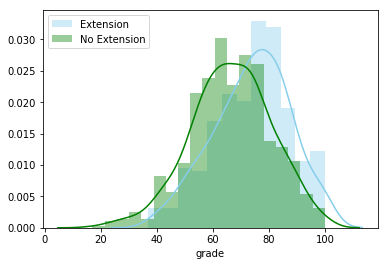

In [0]:
import seaborn as sns
sns.distplot(extension['grade'], color="skyblue", label="Extension")
sns.distplot(no_extension['grade'], color="green", label="No Extension")
plt.legend();

**We would like to see whether getting an extension on the paper was associated with higher grades.**

## Null and Alternative Hypotheses

**To set up our hypothesis test, we can represent the two views of the world using the following null and alternative hypotheses:**

In this cell, write out the appropriate null and alternative hypotheses:

Null: ...

Alternative: ...

(To edit, double click on this cell, and replace the ellipses with your answer)

## Test Statistic

We want our test statistic to be the difference between the mean grade of extension students and mean grade of non-extension students. 

The value below is our **observed test statistic**. 

Large positive values of this statistic will favor the alternative hypothesis because if our difference is quite large, then we can assume that there must be some association with getting an extension and overall higher grades.

In [0]:
observed_difference = np.mean(extension['grade']) - np.mean(no_extension['grade'])
observed_difference 

7.359586835830754

If there were really no difference between the two distributions in the underlying population, then whether each students received extensions or not shouldn't affect their grade, therefore should make no difference to the average. 

## Permutation Testing

To investigate this more, we will simulate the test statistic under the null hypothesis. 

Let's shuffle all the grades randomly among the students.

Here is a function written in Python that takes in a list of values of the same type, also called a series, and shuffles them in a different order:

In [0]:
def shuffle(series):
    '''
    Shuffles a series and resets index to preserve shuffle when adding series
    back to DataFrame.
    '''
    return series.sample(frac=1, replace=False).reset_index(drop=True)

Let's call this function on our grades corresponding to extensions:

In [0]:
rashmika_grade_shuffled = shuffle(rashmika['grade'])
rashmika_grade_shuffled.head()

0    82
1    63
2    81
3    84
4    69
Name: grade, dtype: int64

In [0]:
rashmika['grade'].head()

0    72
1    90
2    95
3    57
4    78
Name: grade, dtype: int64

Let's now do what we did above multiple times. 

In the cell below, we will simulate our test statistic many times, specifically 5000, and collect them in an array.

In [0]:
differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    rashmika["Shuffled"] = shuffle(rashmika["grade"])
  
    # Find the difference between the means of two randomly assigned groups
    extension = rashmika[rashmika['extension?'] == 'yes']['Shuffled']
    no_extension = rashmika[rashmika['extension?'] == 'no']['Shuffled']
    simulated_difference = np.mean(extension) - np.mean(no_extension)

    differences = np.append(differences, simulated_difference)


Here's a histogram of the simulated difference in means below. What do you observe about the empirical distribution?

Text(0.5, 1.0, 'Difference in Means')

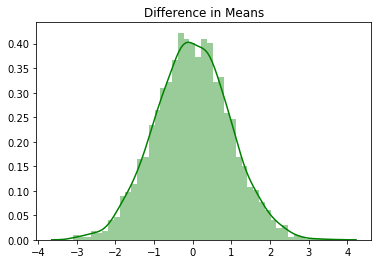

In [0]:
ax = sns.distplot(differences, color="green")
ax.set_title("Difference in Means")

## Calculate P-Value

Let us now calculate the p-value in order to make a conclusion for this hypothesis test. The p-value in this case would be the proportion of values under the sampling distribution of simulated differences above that are larger or equal to the observed difference. 

In [0]:
p_value = np.count_nonzero(differences >= observed_difference) / repetitions
p_value

0.0

## Conclusion

What is the conclusion of our test given this p value? Do we reject or fail to reject the null?

Write your answer here (double click on cell)

## And that concludes our notebook. Thank you for attending the workshop!  